In [1]:
### load all modules

# data storage and analysis
import pandas as pd
import numpy as np
import scipy

# graphing
import matplotlib as mpl
import matplotlib.pyplot as plt

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
### load data

df = pd.read_csv(input(), sep = "\t") 
print(df) # optional for debugging

 Concrete_Data.txt


      Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...      

In [3]:
df.mean(axis = 0)

Cement (component 1)(kg in a m^3 mixture)                281.167864
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     73.895825
Fly Ash (component 3)(kg in a m^3 mixture)                54.188350
Water  (component 4)(kg in a m^3 mixture)                181.567282
Superplasticizer (component 5)(kg in a m^3 mixture)        6.204660
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     972.918932
Fine Aggregate (component 7)(kg in a m^3 mixture)        773.580485
Age (day)                                                 45.662136
Concrete compressive strength(MPa, megapascals)           35.817961
dtype: float64

In [4]:
df.median(axis = 0)

Cement (component 1)(kg in a m^3 mixture)                272.900
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     22.000
Fly Ash (component 3)(kg in a m^3 mixture)                 0.000
Water  (component 4)(kg in a m^3 mixture)                185.000
Superplasticizer (component 5)(kg in a m^3 mixture)        6.400
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     968.000
Fine Aggregate (component 7)(kg in a m^3 mixture)        779.500
Age (day)                                                 28.000
Concrete compressive strength(MPa, megapascals)           34.445
dtype: float64

In [5]:
df.std(axis = 0)

Cement (component 1)(kg in a m^3 mixture)                104.506364
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     86.279342
Fly Ash (component 3)(kg in a m^3 mixture)                63.997004
Water  (component 4)(kg in a m^3 mixture)                 21.354219
Superplasticizer (component 5)(kg in a m^3 mixture)        5.973841
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      77.753954
Fine Aggregate (component 7)(kg in a m^3 mixture)         80.175980
Age (day)                                                 63.169912
Concrete compressive strength(MPa, megapascals)           16.705742
dtype: float64

In [6]:
df.mean(axis = 0)/df.std(axis = 0)

Cement (component 1)(kg in a m^3 mixture)                 2.690438
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.856472
Fly Ash (component 3)(kg in a m^3 mixture)                0.846733
Water  (component 4)(kg in a m^3 mixture)                 8.502642
Superplasticizer (component 5)(kg in a m^3 mixture)       1.038638
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     12.512790
Fine Aggregate (component 7)(kg in a m^3 mixture)         9.648532
Age (day)                                                 0.722846
Concrete compressive strength(MPa, megapascals)           2.144051
dtype: float64

In [7]:
df.sort_values(by = ['Concrete compressive strength(MPa, megapascals) '], ascending = False)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
381,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
159,389.9,189.0,0.0,145.9,22.0,944.7,755.8,56,79.40
...,...,...,...,...,...,...,...,...,...
717,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3,4.83
668,153.0,102.0,0.0,192.0,0.0,888.0,943.1,3,4.78
652,102.0,153.0,0.0,192.0,0.0,887.0,942.0,3,4.57
705,122.6,183.9,0.0,203.5,0.0,958.2,800.1,3,3.32


In [8]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

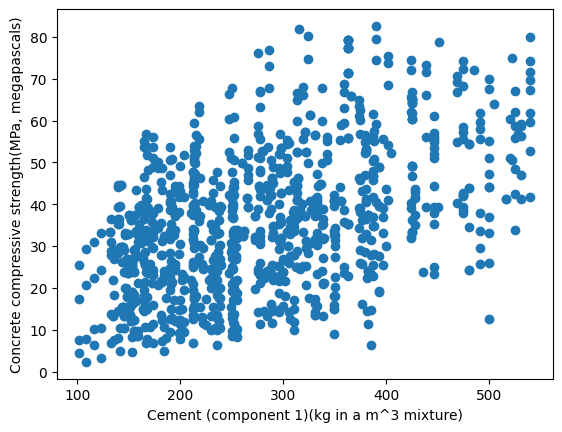

In [9]:
### scatterplot

fig,ax = plt.subplots()
ax.set_xlabel('Cement (component 1)(kg in a m^3 mixture)')
ax.set_ylabel('Concrete compressive strength(MPa, megapascals)')
plt.scatter(df['Cement (component 1)(kg in a m^3 mixture)'], df['Concrete compressive strength(MPa, megapascals) '])

Cement (component 1)(kg in a m^3 mixture)
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
Fly Ash (component 3)(kg in a m^3 mixture)
Water  (component 4)(kg in a m^3 mixture)
Superplasticizer (component 5)(kg in a m^3 mixture)
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
Fine Aggregate (component 7)(kg in a m^3 mixture)
Age (day)
Concrete compressive strength(MPa, megapascals) 


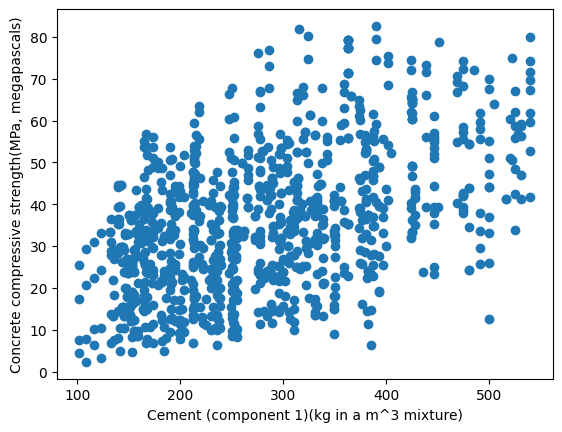

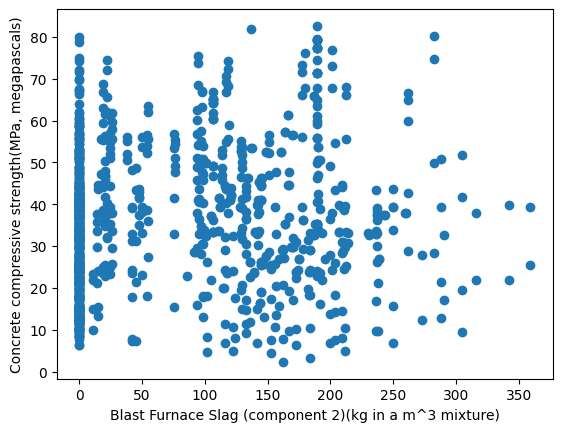

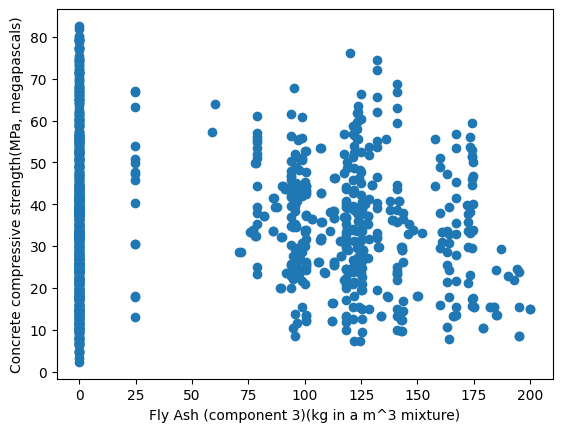

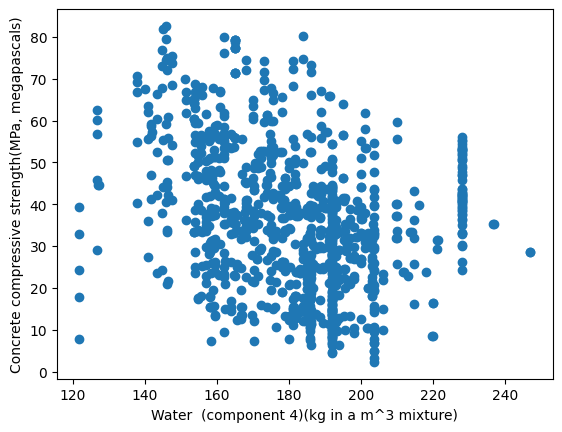

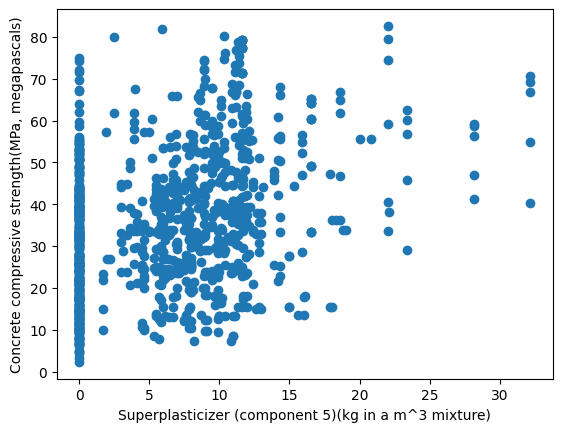

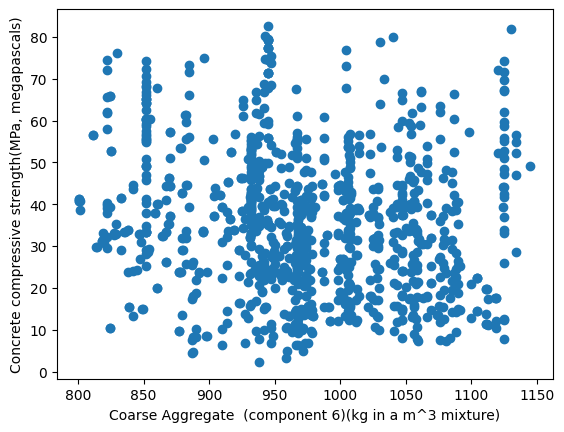

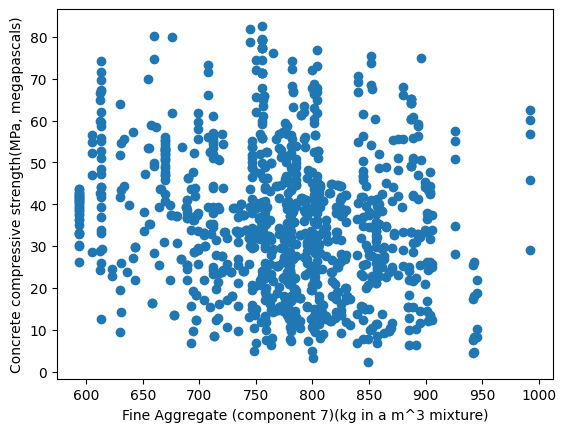

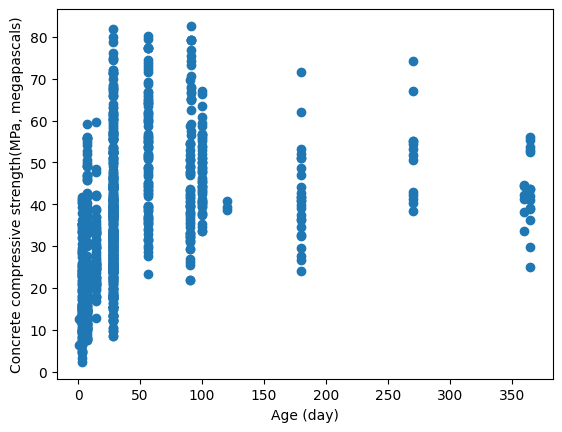

In [10]:
# i = input()

for i in df: # i = column
    print(i)
    if i != "Concrete compressive strength(MPa, megapascals) ":
        fig,ax = plt.subplots()
        ax.set_xlabel(i)
        ax.set_ylabel('Concrete compressive strength(MPa, megapascals)')
        plt.scatter(df[i], df['Concrete compressive strength(MPa, megapascals) '])

In [11]:
### regression

# pearson over spearman: linear should represent, many have the same values (0)

for i in df:
    if i != "Concrete compressive strength(MPa, megapascals) ":
        linR = scipy.stats.linregress(df[i], df['Concrete compressive strength(MPa, megapascals) '])
        # print(linR)
        m = np.round(linR.slope, 3)
        b = np.round(linR.intercept, 3)
        r = np.round(linR.rvalue, 3)
        p = linR.pvalue
        print(i, "   Regression Line: y=" + str(m) + "x+" + str(b), "; R=" + str(r), "; p=" + str(p))

Cement (component 1)(kg in a m^3 mixture)    Regression Line: y=0.08x+13.443 ; R=0.498 ; p=1.3241833072270048e-65
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    Regression Line: y=0.026x+33.889 ; R=0.135 ; p=1.413567382517977e-05
Fly Ash (component 3)(kg in a m^3 mixture)    Regression Line: y=-0.028x+37.314 ; R=-0.106 ; p=0.0006751583555754655
Water  (component 4)(kg in a m^3 mixture)    Regression Line: y=-0.227x+76.958 ; R=-0.29 ; p=2.3506546475110196e-21
Superplasticizer (component 5)(kg in a m^3 mixture)    Regression Line: y=1.024x+29.466 ; R=0.366 ; p=5.131485052741784e-34
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    Regression Line: y=-0.035x+70.295 ; R=-0.165 ; p=1.0183513390865196e-07
Fine Aggregate (component 7)(kg in a m^3 mixture)    Regression Line: y=-0.035x+62.775 ; R=-0.167 ; p=6.704113568134071e-08
Age (day)    Regression Line: y=0.087x+31.847 ; R=0.329 ; p=2.1063405536321048e-27


LinregressResult(slope=0.07958033584687194, intercept=13.44252811239993, rvalue=0.4978319193241574, pvalue=1.3241833072270048e-65, stderr=0.0043239689271733816, intercept_stderr=1.296948113490991)
[102.0, 540.0] [21.559722368780868, 56.41590946971077]


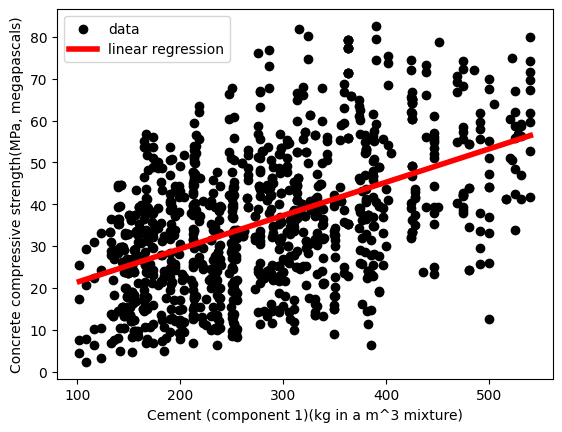

In [12]:
fig,ax = plt.subplots()
ax.set_xlabel('Cement (component 1)(kg in a m^3 mixture)')
ax.set_ylabel('Concrete compressive strength(MPa, megapascals)')
plt.scatter(df['Cement (component 1)(kg in a m^3 mixture)'], df['Concrete compressive strength(MPa, megapascals) '], c = "black")

linR = scipy.stats.linregress(df['Cement (component 1)(kg in a m^3 mixture)'], df['Concrete compressive strength(MPa, megapascals) '])
print(linR)

x = [0, 100]
y = [0, 100]

x[0] = df["Cement (component 1)(kg in a m^3 mixture)"].min()
y[0] = (linR.slope * x[0]) + linR.intercept
x[1] = df["Cement (component 1)(kg in a m^3 mixture)"].max()
y[1] = (linR.slope * x[1]) + linR.intercept
print(x, y)

plt.plot(x, y, lw = 4, c = "red")
ax.legend(["data", "linear regression"])

LinregressResult(slope=0.07958033584687194, intercept=13.44252811239993, rvalue=0.4978319193241574, pvalue=1.3241833072270048e-65, stderr=0.0043239689271733816, intercept_stderr=1.296948113490991)
[102.0, 540.0] [21.559722368780868, 56.41590946971077]


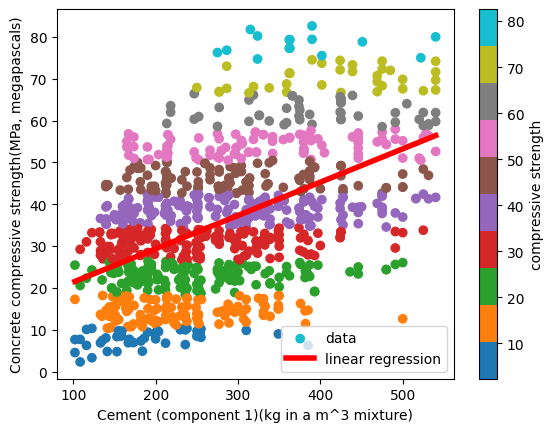

In [13]:
fig,ax = plt.subplots()
ax.set_xlabel('Cement (component 1)(kg in a m^3 mixture)')
ax.set_ylabel('Concrete compressive strength(MPa, megapascals)')
plt.scatter(df['Cement (component 1)(kg in a m^3 mixture)'], df['Concrete compressive strength(MPa, megapascals) '], c = df['Concrete compressive strength(MPa, megapascals) '], cmap = "tab10")
linR = scipy.stats.linregress(df['Cement (component 1)(kg in a m^3 mixture)'], df['Concrete compressive strength(MPa, megapascals) '])
print(linR)

x = [0, 100]
y = [0, 100]

x[0] = df["Cement (component 1)(kg in a m^3 mixture)"].min()
y[0] = (linR.slope * x[0]) + linR.intercept
x[1] = df["Cement (component 1)(kg in a m^3 mixture)"].max()
y[1] = (linR.slope * x[1]) + linR.intercept
print(x, y)

plt.plot(x, y, lw = 4, c = "red")
plt.colorbar(label = "compressive strength")
ax.legend(["data", "linear regression"])

In [15]:
### df exists already and is the whole dataset

df_temp1 = df[df['Age (day)'] > 45] # temp1 because we are going to modify it more
df_f = df_temp1[df_temp1['Age (day)'] < 150] # make sure we are calling the correct dataframe

print(df_f)

     Cement (component 1)(kg in a m^3 mixture)  \
5                                        266.0   
10                                       198.6   
13                                       190.0   
15                                       380.0   
16                                       139.6   
..                                         ...   
790                                      349.0   
796                                      500.0   
805                                      393.0   
812                                      310.0   
819                                      525.0   

     Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
5                                                114.0       
10                                               132.4       
13                                               190.0       
15                                                 0.0       
16                                               209.4       
..                         

0.558 	 Cement (component 1)(kg in a m^3 mixture)
0.447 	 Blast Furnace Slag (component 2)(kg in a m^3 mixture)
-0.204 	 Fly Ash (component 3)(kg in a m^3 mixture)
-0.476 	 Water  (component 4)(kg in a m^3 mixture)
0.621 	 Superplasticizer (component 5)(kg in a m^3 mixture)
-0.286 	 Coarse Aggregate  (component 6)(kg in a m^3 mixture)
-0.182 	 Fine Aggregate (component 7)(kg in a m^3 mixture)
-0.135 	 Age (day)


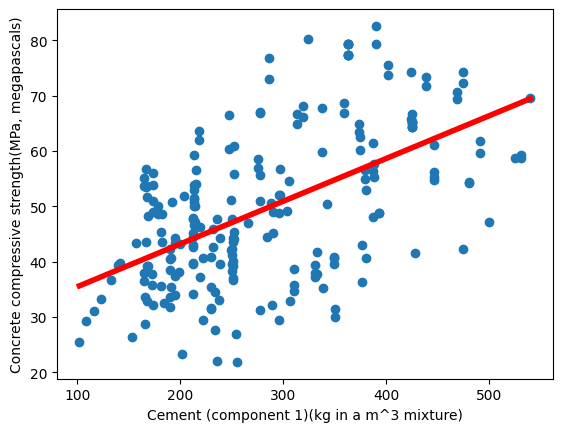

In [22]:
### regression on just this data

for i in df:
    if i != "Concrete compressive strength(MPa, megapascals) ":
        linR = scipy.stats.linregress(df_f[i], df_f['Concrete compressive strength(MPa, megapascals) '])
        # print(linR)
        m = np.round(linR.slope, 3)
        b = np.round(linR.intercept, 3)
        r = np.round(linR.rvalue, 3)
        p = linR.pvalue
        print(r, "\t", i)

# regression line
linR = scipy.stats.linregress(df_f['Cement (component 1)(kg in a m^3 mixture)'], df_f['Concrete compressive strength(MPa, megapascals) '])
x = [0, 100]
y = [0, 100]

x[0] = df_f["Cement (component 1)(kg in a m^3 mixture)"].min()
y[0] = (linR.slope * x[0]) + linR.intercept
x[1] = df_f["Cement (component 1)(kg in a m^3 mixture)"].max()
y[1] = (linR.slope * x[1]) + linR.intercept

# plotting data
fig,ax = plt.subplots()
ax.set_xlabel('Cement (component 1)(kg in a m^3 mixture)')
ax.set_ylabel('Concrete compressive strength(MPa, megapascals)')
plt.scatter(df_f['Cement (component 1)(kg in a m^3 mixture)'], df_f['Concrete compressive strength(MPa, megapascals) '])
plt.plot(x, y, lw = 4, c = "red")

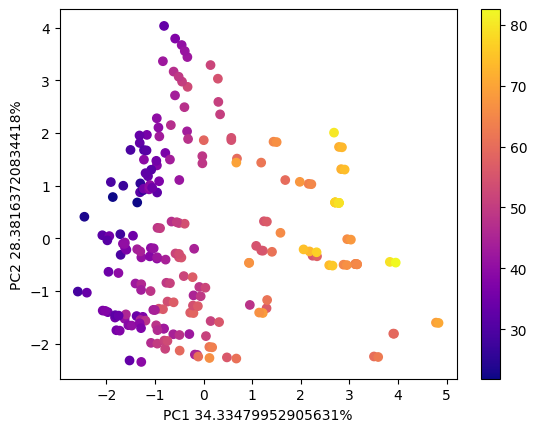

In [41]:
### PCA


# filter data first
dfclean = df_f.drop('Concrete compressive strength(MPa, megapascals) ', axis = 1)

# rescaling our data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfclean)

pca = PCA(n_components = 0.99)
PCs = pca.fit_transform(scaled_data)

#print(PCs)
pc1pct = str(pca.explained_variance_ratio_[0]*100) + "%"
pc2pct = str(pca.explained_variance_ratio_[1]*100) + "%"
#print(pca.components_)

fig,ax = plt.subplots()
ax.set_xlabel("PC1 " + pc1pct)
ax.set_ylabel("PC2 " + pc2pct)

plt.scatter(PCs[:, 0], PCs[:, 1], c = df_f['Concrete compressive strength(MPa, megapascals) '], cmap = "plasma")
plt.colorbar()